### Lunar Lander experiment

In [1]:
import gymnasium as gym
import time
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

%matplotlib inline
from dqn_agent import Agent

In [2]:
# Make environment
env = gym.make("LunarLander-v2", render_mode='rgb_array')

print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

# Make agent
agent = Agent(state_size=8, action_size=4, seed=0)

State shape:  (8,)
Number of actions:  4


In [ ]:
env.reset()
for step in range(200):
    
    env.render()
    action = env.action_space.sample() # cart accelerates to the right
    observation,reward,terminated,truncated,info = env.step(action)
    time.sleep(0.5)
    if terminated or truncated:
        env.reset()
env.close()

Episode 100	Average Score: -158.68
Episode 200	Average Score: -101.04
Episode 300	Average Score: -10.957
Episode 400	Average Score: 32.038
Episode 500	Average Score: 118.93
Episode 600	Average Score: 152.11
Episode 700	Average Score: 150.54
Episode 800	Average Score: 120.67
Episode 900	Average Score: 123.77
Episode 1000	Average Score: 132.74
Episode 1100	Average Score: 164.67
Episode 1200	Average Score: 186.59
Episode 1300	Average Score: 165.16
Episode 1400	Average Score: 202.17

Environment solved in 1300 episodes!	Average Score: 202.17


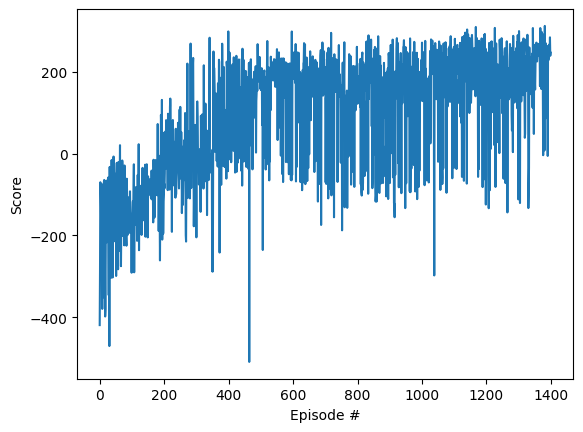

In [3]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state, info = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, info, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_car_pole.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Close the environment
env.close()